🔍 Columns: ['Data as of', 'Start Date', 'End Date', 'MMWR Year', 'MMWR Week', 'Week Ending Date', 'HRR Name', 'HRR Number', 'State', 'Total Deaths', 'COVID-19 Deaths', 'Total Deaths over 65 years', 'COVID-19 Deaths over 65 years', 'Total Deaths 65 to 74 years', 'COVID-19 Deaths 65 to 74 years', 'Total Deaths 75 to 84 years', 'COVID-19 Deaths 75 to 84 years', 'Total Deaths over 85 years', 'COVID-19 Deaths over 85 years', 'Footnote', 'Accuracy_index']
✅ Using: Date='Week Ending Date', Deaths='COVID-19 Deaths', Region='HRR Name'


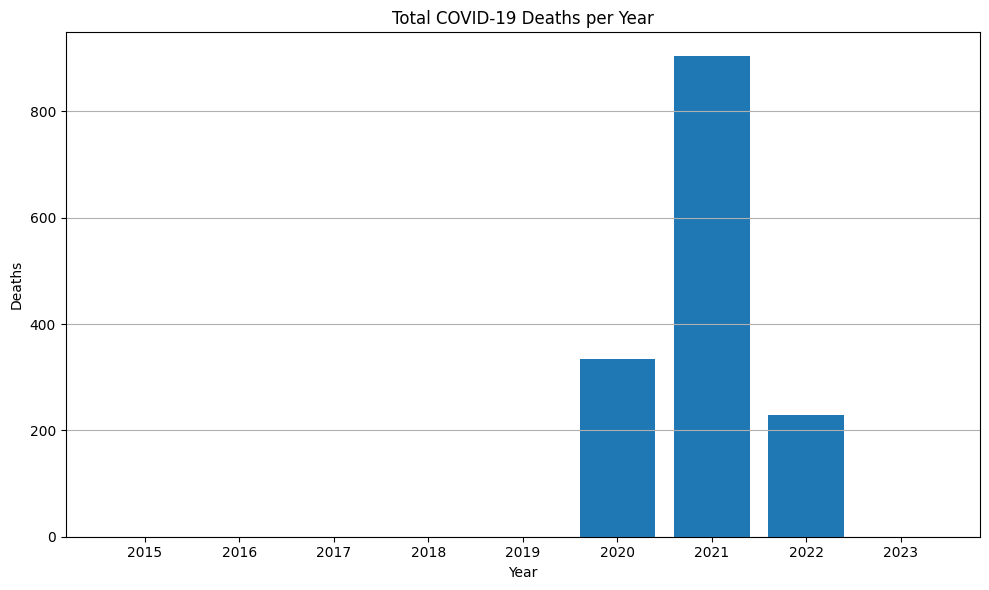

interactive(children=(Dropdown(description='Year:', options=(np.int32(2015), np.int32(2016), np.int32(2017), n…

<function __main__.plot_by_year(yr)>

In [32]:
import pandas as pd
import matplotlib.pyplot as plt
import ipywidgets as widgets

# 1) Load & display your columns
file_path = r"C:\Users\Ganesh\Downloads\AH_Provisional_COVID-19_Deaths_by_Hospital_Referral_Region.csv"
df = pd.read_csv(file_path)
df.columns = df.columns.str.strip()
print("🔍 Columns:", df.columns.tolist())

# 2) Auto-detect key columns
def find_column(fragments):
    for frag in fragments:
        for col in df.columns:
            if frag.lower() in col.lower():
                return col
    return None

date_col   = find_column(["week ending", "end date", "start date"])
death_col  = find_column(["covid-19 deaths", "total deaths"])
region_col = find_column(["hrr name", "hrr", "region", "referral"])

if not date_col:   raise KeyError("Date column not detected—check printed list above.")
if not death_col:  raise KeyError("Death column not detected—check printed list above.")
if not region_col: raise KeyError("Region column not detected—check printed list above.")

print(f"✅ Using: Date='{date_col}', Deaths='{death_col}', Region='{region_col}'")

# 3) Clean & prepare data
df[date_col]  = pd.to_datetime(df[date_col], errors='coerce')
df = df.dropna(subset=[date_col])
df['Year']    = df[date_col].dt.year
df[death_col] = pd.to_numeric(df[death_col], errors='coerce').fillna(0)

# 4) Plot total deaths per year with matplotlib to avoid seaborn warning
yearly = df.groupby('Year')[death_col].sum().reset_index()
plt.figure(figsize=(10,6))
plt.bar(yearly['Year'].astype(str), yearly[death_col])
plt.title('Total COVID-19 Deaths per Year')
plt.xlabel('Year')
plt.ylabel('Deaths')
plt.grid(axis='y')
plt.tight_layout()
plt.show()

# 5) Interactive top-10 regions by year
def plot_by_year(yr):
    top10 = (df[df['Year']==yr]
             .groupby(region_col)[death_col]
             .sum()
             .sort_values(ascending=False)
             .head(10))
    plt.figure(figsize=(12,6))
    plt.bar(top10.index, top10.values)
    plt.title(f'Top 10 {region_col}s in {yr}')
    plt.xlabel(region_col)
    plt.ylabel('Deaths')
    plt.xticks(rotation=45, ha='right')
    plt.grid(axis='y')
    plt.tight_layout()
    plt.show()

widgets.interact(
    plot_by_year,
    yr=widgets.Dropdown(
        options=sorted(df['Year'].unique()),
        description='Year:',
        style={'description_width':'initial'}
    )
)
